In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
path = '/content/drive/MyDrive/Saras_AI/FashionNet.keras'

In [48]:
from tensorflow.keras.models import load_model
model = load_model(path)

In [49]:
path = '/content/drive/MyDrive/Saras_AI/FashionNet.pkl'

In [50]:
df = pd.read_pickle(path)

In [51]:
df.head()

,image,label,tag
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,Ankle boot
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098...",0,T-shirt/top
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,T-shirt/top
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12...",3,Dress
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,T-shirt/top


In [52]:
X = np.stack(df.iloc[:,0])
X.astype('float32')
X.shape

(60000, 28, 28)

In [72]:
X = X.reshape(-1,28*28)

In [106]:
y = np.stack(df.iloc[:,1])
y.astype('float32')
y.shape

(60000,)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
def predict_output(model, input_data):
    predictions = model.predict(input_data) #The predictions we get as output is a 10 column array for each record with small values adding to 1 coz of softmax. The index of the largest value is the label.
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes

In [57]:
def evaluate_model(model, X, y):
    y_pred = predict_output(model, X)
    accuracy = accuracy_score(y, y_pred)
    return accuracy

In [58]:
def train_test_eval(model, X_train, y_train, X_test, y_test):
    print("Training Accuracy:", evaluate_model(model, X_train, y_train))
    print("Testing Accuracy:", evaluate_model(model, X_test, y_test))

### Checking the model configurations ###

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │         2,355 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,187 (28.08 KB)

 Trainable params: 2,395 (9.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,792 (18.72 KB)

In [60]:
config = model.get_config()
print(config)

{'name': 'sequential', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 3, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': 

In [61]:
# Optimizer
print("Optimizer:", model.optimizer.__class__.__name__)
print("Optimizer Config:", model.optimizer.get_config())

# Loss function
print("Loss function:", model.loss)

Optimizer: Adam
Optimizer Config: {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Loss function: sparse_categorical_crossentropy


In [62]:
for layer in model.layers:
    if hasattr(layer, 'activation'):
        print(f"Layer: {layer.name}, Activation: {layer.activation.__name__}")

Layer: dense_1, Activation: sigmoid
Layer: dense_2, Activation: softmax


In [63]:
history1 = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data = (X_test, y_test))

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7888 - loss: 0.6102 - val_accuracy: 0.7787 - val_loss: 0.6392
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7920 - loss: 0.6069 - val_accuracy: 0.7774 - val_loss: 0.6445
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7932 - loss: 0.6081 - val_accuracy: 0.7777 - val_loss: 0.6355
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7928 - loss: 0.5996 - val_accuracy: 0.7830 - val_loss: 0.6317
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7947 - loss: 0.5949 - val_accuracy: 0.7838 - val_loss: 0.6310
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7975 - loss: 0.5905 - val_accuracy: 0.7857 - val_loss: 0.6277
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7955 - loss: 0.6031 - val_accuracy: 0.7838 - val_loss: 0.6318
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7972 - loss: 0.5904 - val_accuracy: 0.

In [64]:
y_test.shape

(12000,)

In [65]:
pred = model.predict(X_test)
np.clip(np.round(pred), 0, 9)[0].argmax()

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(8)

In [66]:
train_test_eval(model, X_train, y_train, X_test, y_test)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Accuracy: 0.8154375
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Testing Accuracy: 0.8000833333333334


### Experimenting with learning rates, optimizers, activation functions and batch sizes ###

- The activation function currently in the hidden layer is sigmoid. Generally, ReLU performs better, so experimenting with ReLU.
- Adam is generally a reliable optimizer overall. Had tried with SGD and it wasn't good. Will experiment with RMSProp.
- The learning rate is 0.0010000000474974513. I'll experiment increasing and decreasing this.
- I'll vary the batch sizes to 32 and 128.

Below two cells code source: ChatGPT

- Link: https://chatgpt.com/share/68870848-96c0-800e-9a66-3c12e5690e72


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(activation='relu', optimizer='adam', learning_rate=0.001):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Adjust input shape as needed
    model.add(Dense(3, activation=activation))
    model.add(Dense(10, activation='softmax'))  # 10 classes

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [68]:
X.shape

(60000, 784)

In [73]:
X_train = X_train.reshape(-1,28,28)

In [74]:
X_test = X_test.reshape(-1,28,28)

In [76]:
y_train.shape

(48000,)

In [77]:
y_test.shape

(12000,)

In [79]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [78]:
y.dtype

dtype('int64')

In [80]:
activations = ['relu', 'sigmoid']
optimizers = ['adam', 'rmsprop']
learning_rates = [0.001, 0.01, 0.0001]
batch_sizes = [32, 128]

results = []

for activation in activations:
    for optimizer in optimizers:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                print(f"Training with activation={activation}, optimizer={optimizer}, lr={lr}, batch_size={batch_size}")

                model = build_model(activation=activation, optimizer=optimizer, learning_rate=lr)
                history = model.fit(X_train, y_train,
                                    epochs=10,
                                    batch_size=batch_size,
                                    validation_data=(X_test, y_test),
                                    verbose=0)

                test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
                results.append({
                    'activation': activation,
                    'optimizer': optimizer,
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'test_accuracy': test_acc
                })

# Sort results by best accuracy
results_sorted = sorted(results, key=lambda x: x['test_accuracy'], reverse=True)
for res in results_sorted:
    print(res)

Training with activation=relu, optimizer=adam, lr=0.001, batch_size=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with activation=relu, optimizer=adam, lr=0.001, batch_size=128
Training with activation=relu, optimizer=adam, lr=0.01, batch_size=32
Training with activation=relu, optimizer=adam, lr=0.01, batch_size=128
Training with activation=relu, optimizer=adam, lr=0.0001, batch_size=32
Training with activation=relu, optimizer=adam, lr=0.0001, batch_size=128
Training with activation=relu, optimizer=rmsprop, lr=0.001, batch_size=32
Training with activation=relu, optimizer=rmsprop, lr=0.001, batch_size=128
Training with activation=relu, optimizer=rmsprop, lr=0.01, batch_size=32
Training with activation=relu, optimizer=rmsprop, lr=0.01, batch_size=128
Training with activation=relu, optimizer=rmsprop, lr=0.0001, batch_size=32
Training with activation=relu, optimizer=rmsprop, lr=0.0001, batch_size=128
Training with activation=sigmoid, optimizer=adam, lr=0.001, batch_size=32
Training with activation=sigmoid, optimizer=adam, lr=0.001, batch_size=128
Training with activation=sigmoid, optimizer=ad

In [81]:
model = build_model(activation='relu', optimizer='adam', learning_rate=0.01)
hisory = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test) )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2194 - loss: 1.9606 - val_accuracy: 0.3031 - val_loss: 1.6142
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3424 - loss: 1.5457 - val_accuracy: 0.3825 - val_loss: 1.4296
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3709 - loss: 1.4263 - val_accuracy: 0.3882 - val_loss: 1.4013
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3884 - loss: 1.3888 - val_accuracy: 0.4050 - val_loss: 1.3722
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3963 - loss: 1.3711 - val_accuracy: 0.3983 - val_loss: 1.3606
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3991 - loss: 1.3599 - val_accuracy: 0.4121 - val_loss: 1.3440
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4138 - loss: 1.3458 - val_accuracy: 0.3905 - val_loss: 1.3521
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4209 - loss: 1.3371 - val_accuracy: 0.

In [82]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_test if it's one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] == 10:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


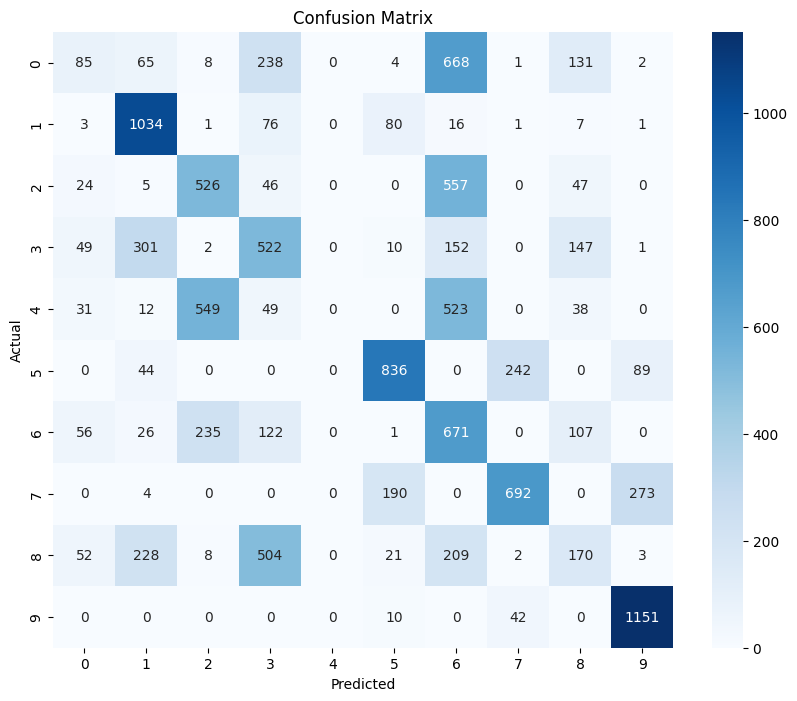

In [83]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0     0.2833    0.0707    0.1132      1202
           1     0.6015    0.8482    0.7039      1219
           2     0.3958    0.4365    0.4152      1205
           3     0.3353    0.4409    0.3809      1184
           4     0.0000    0.0000    0.0000      1202
           5     0.7257    0.6903    0.7076      1211
           6     0.2400    0.5509    0.3343      1218
           7     0.7061    0.5971    0.6470      1159
           8     0.2628    0.1420    0.1844      1197
           9     0.7572    0.9568    0.8454      1203

    accuracy                         0.4739     12000
   macro avg     0.4308    0.4733    0.4332     12000
weighted avg     0.4302    0.4739    0.4331     12000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
train_loss = hisory.history['loss']
test_loss = hisory.history['val_loss']

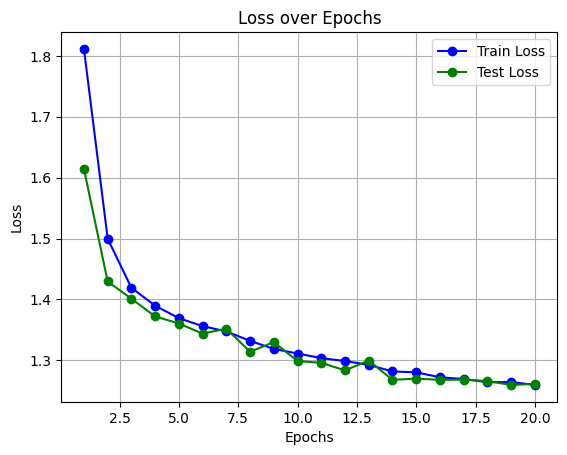

In [110]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo-', label='Train Loss')
plt.plot(epochs, test_loss, 'go-', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

### Summary of the hyper parameter tuning stratergy ###

- Chose the hyperparameters and a few manual values in the range of initial parameters.
- Applied a Grid Search on the specific chosen hyperparameters with a fixed epoch of 10.
- A few observed points are about the hyper parameters are:
 - Most effective batch size: 128
 - Suitable optimizer: Adam
 - ReLU performed better than sigmoid.
 - Learning rate can be 0.01 or 0.001. As the epochs were fixed, we can't tell much about this.


In [91]:
model.save('FashionNet_Optimized.keras')